In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
experiments_path = '../data/processed/bayesian_opt'
csv_files = glob.glob(experiments_path + '/**/*.csv',recursive=True)

In [3]:
dfs = [pd.read_csv(csv) for csv in csv_files]

In [4]:
all_dfs = pd.read_csv('../data/processed/bayesian_opt/results.csv')

In [5]:
all_dfs 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,video,max_target,workflow,params,param_bounds
0,0,0.0,0.0,MkiUBJcgdUY,0.222222,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 14.502132028215444, 'sim_thresh...","{""window_size"": (20,150),""step_size"":(10,60),'..."
1,1,1.0,1.0,MkiUBJcgdUY,0.222222,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 12.880535344902679, 'sim_thresh...","{""window_size"": (20,150),""step_size"":(10,60),'..."
2,2,2.0,2.0,MkiUBJcgdUY,0.444444,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 15.53458736722668, 'sim_thresh'...","{""window_size"": (20,150),""step_size"":(10,60),'..."
3,3,3.0,3.0,MkiUBJcgdUY,0.277778,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 12.0, 'sim_thresh': 0.300000010...","{""window_size"": (20,150),""step_size"":(10,60),'..."
4,4,4.0,4.0,MkiUBJcgdUY,0.222222,sliding_window-tfidf-cosine-None-spectral_clus...,"{'n_clusters': 13.425649132739782, 'sim_thresh...","{""window_size"": (20,150),""step_size"":(10,60),'..."
...,...,...,...,...,...,...,...,...
1776,1776,NaN,NaN,tORLeHHtazM,0.000000,"audio-tfidf-cosine-median_(3,3)-spectral_clust...","{'n_clusters': 14.581238473205385, 'silence_th...","{'silence_threshold': (-30, 0), 'slice_length'..."
1777,1777,NaN,NaN,tORLeHHtazM,0.000000,"audio-tfidf-cosine-median_(3,3)-spectral_clust...","{'n_clusters': 13.176510567915646, 'silence_th...","{'silence_threshold': (-30, 0), 'slice_length'..."
1778,1778,NaN,NaN,tORLeHHtazM,0.000000,"audio-tfidf-cosine-median_(3,3)-spectral_clust...","{'n_clusters': 13.528216928616235, 'silence_th...","{'silence_threshold': (-30, 0), 'slice_length'..."
1779,1779,NaN,NaN,tORLeHHtazM,0.000000,"audio-tfidf-cosine-median_(3,3)-spectral_clust...","{'n_clusters': 13.011902377405903, 'silence_th...","{'silence_threshold': (-30, 0), 'slice_length'..."


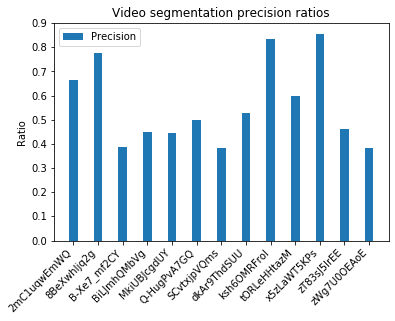

In [32]:
'''Best results for the videos'''
grp = all_dfs.groupby('video')
maxes = grp['max_target'].max()
videos = grp.groups.keys()

fig,ax =  plt.subplots()
ax.bar(videos,maxes,0.35,label='Precision')
ax.set_ylabel('Ratio')
ax.set_title('Video segmentation precision ratios')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend()
plt.show()

dict_keys(['2mC1uqwEmWQ', '8BeXwhljq2g', 'B-Xe7_mf2CY', 'BiLJmhQMbVg', 'MkiUBJcgdUY', 'Q-HugPvA7GQ', 'SCvtxjpVQms', 'dkAr9ThdSUU', 'ksh6OMRFroI', 'tORLeHHtazM', 'x5zLaWT5KPs', 'zT83sJ5IrEE', 'zWg7U0OEAoE'])
video
2mC1uqwEmWQ    0.666667
8BeXwhljq2g    0.777778
B-Xe7_mf2CY    0.388889
BiLJmhQMbVg    0.450000
MkiUBJcgdUY    0.444444
Q-HugPvA7GQ    0.500000
SCvtxjpVQms    0.384615
dkAr9ThdSUU    0.529412
ksh6OMRFroI    0.833333
tORLeHHtazM    0.600000
x5zLaWT5KPs    0.857143
zT83sJ5IrEE    0.461538
zWg7U0OEAoE    0.384615
Name: max_target, dtype: float64


In [28]:
''' Calculate bias'''
Ex = all_dfs.groupby(["workflow",'video'])['max_target'].mean()
Fx = 1
Ex =Ex.apply(lambda x: Fx-x)
Ex

workflow                                                      video      
sliding_window-tfidf-cosine-None-spectral_clustering          2mC1uqwEmWQ    0.573333
                                                              8BeXwhljq2g    0.733333
                                                              B-Xe7_mf2CY    0.788889
                                                              BiLJmhQMbVg    1.000000
                                                              MkiUBJcgdUY    0.722222
                                                              Q-HugPvA7GQ    0.828571
                                                              SCvtxjpVQms    0.953846
                                                              dkAr9ThdSUU    0.600000
                                                              ksh6OMRFroI    0.516667
                                                              tORLeHHtazM    1.000000
                                                              x5zL

In [30]:
'''Calculating variance'''
all_dfs.groupby(["workflow",'video'])['max_target'].var()

workflow                                                      video      
sliding_window-tfidf-cosine-None-spectral_clustering          2mC1uqwEmWQ    0.063556
                                                              8BeXwhljq2g    0.133333
                                                              B-Xe7_mf2CY    0.016049
                                                              BiLJmhQMbVg    0.000000
                                                              MkiUBJcgdUY    0.009259
                                                              Q-HugPvA7GQ    0.027041
                                                              SCvtxjpVQms    0.010651
                                                              dkAr9ThdSUU    0.050865
                                                              ksh6OMRFroI    0.195833
                                                              tORLeHHtazM    0.000000
                                                              x5zL